In [276]:
import pandas as pd

In [278]:
df=pd.read_csv("C:/Users/Vedit/Downloads/ecommerce_transactions.csv")

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    3000 non-null   object 
 1   StockCode    3000 non-null   object 
 2   Description  3000 non-null   object 
 3   Quantity     3000 non-null   int64  
 4   InvoiceDate  3000 non-null   object 
 5   UnitPrice    3000 non-null   float64
 6   CustomerID   488 non-null    object 
 7   Country      3000 non-null   object 
 8   TotalPrice   3000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 211.1+ KB


In [282]:
df.describe()

,Quantity,UnitPrice,TotalPrice
count,3000.000000,3000.000000,3000.000000
mean,4.948333,52.040657,259.615800
std,2.588931,27.311891,205.995717
min,1.000000,5.000000,5.130000
25%,3.000000,28.607500,88.020000
50%,5.000000,51.435000,204.720000
75%,7.000000,75.450000,378.412500
max,9.000000,99.960000,897.570000


In [284]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,INV100000,S4204,Mug,7,2023-04-11 03:53:00,40.85,NaN,Netherlands,285.95
1,INV100001,S5668,T-Shirt,4,2023-10-06 04:19:00,96.59,NaN,Spain,386.36
2,INV100002,S9254,Notebook,8,2023-04-12 14:48:00,13.48,NaN,Spain,107.84
3,INV100003,S8395,Mug,5,2023-04-27 04:52:00,70.27,NaN,Spain,351.35
4,INV100004,S9427,Mug,7,2023-06-24 17:37:00,51.91,CUST1005,United Kingdom,363.37


In [286]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2512
Country           0
TotalPrice        0
dtype: int64

In [288]:
df.duplicated().sum()

0

In [290]:
df['InvoiceNo'].duplicated().sum()

0

In [292]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [294]:
df=df[df['Quantity']>0]

In [296]:
df['isfree']=df['UnitPrice'] == 0

In [298]:
df['CustomerID']=df['CustomerID'].fillna('guest')

In [300]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isfree
0,INV100000,S4204,Mug,7,2023-04-11 03:53:00,40.85,guest,Netherlands,285.95,False
1,INV100001,S5668,T-Shirt,4,2023-10-06 04:19:00,96.59,guest,Spain,386.36,False
2,INV100002,S9254,Notebook,8,2023-04-12 14:48:00,13.48,guest,Spain,107.84,False
3,INV100003,S8395,Mug,5,2023-04-27 04:52:00,70.27,guest,Spain,351.35,False
4,INV100004,S9427,Mug,7,2023-06-24 17:37:00,51.91,CUST1005,United Kingdom,363.37,False


In [302]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [304]:
print("Free product transactions:\n", df['isfree'].sum())

Free product transactions:
 0


In [306]:
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

In [308]:
df['year']=df['InvoiceDate'].dt.year

In [310]:
df['month']=df['InvoiceDate'].dt.month

In [312]:
df['Day']=df['InvoiceDate'].dt.day

In [314]:
df['day_of_week']=df['InvoiceDate'].dt.day_name()

In [316]:
df['hour']=df['InvoiceDate'].dt.hour

In [318]:
df['InvoiceTotal'] = df.groupby('InvoiceNo')['TotalPrice'].transform('sum')


In [352]:
df['CustomerType'] = df['CustomerID'].apply(lambda x: 'Guest' if x == 'guest' else 'Returning')

In [356]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isfree,year,month,Day,day_of_week,hour,InvoiceTotal,CustomerType
0,INV100000,S4204,Mug,7,2023-04-11 03:53:00,40.85,guest,Netherlands,285.95,False,2023,4,11,Tuesday,3,285.95,Guest
1,INV100001,S5668,T-Shirt,4,2023-10-06 04:19:00,96.59,guest,Spain,386.36,False,2023,10,6,Friday,4,386.36,Guest
2,INV100002,S9254,Notebook,8,2023-04-12 14:48:00,13.48,guest,Spain,107.84,False,2023,4,12,Wednesday,14,107.84,Guest
3,INV100003,S8395,Mug,5,2023-04-27 04:52:00,70.27,guest,Spain,351.35,False,2023,4,27,Thursday,4,351.35,Guest
4,INV100004,S9427,Mug,7,2023-06-24 17:37:00,51.91,CUST1005,United Kingdom,363.37,False,2023,6,24,Saturday,17,363.37,Returning


In [358]:
top_products_by_quantity=df.groupby("Description")['Quantity'].sum().sort_values(ascending=False)

In [360]:
print("Highest products bought:\n",top_products_by_quantity,"\n")

Highest products bought:
 Description
Backpack      2274
Phone Case    2254
Pen           2187
Charger       2154
T-Shirt       2034
Mug           2014
Notebook      1928
Name: Quantity, dtype: int64 



In [362]:
total_revenue=df['TotalPrice'].sum()

In [364]:
print("Toal Revenue: ",total_revenue)

Toal Revenue:  778847.4


In [366]:
highes_revenue_giving_product=df.groupby("Description")['TotalPrice'].sum().sort_values(ascending=False)

In [368]:
percentage_of_revenue=(highes_revenue_giving_product/total_revenue)*100

In [370]:
revenue_summary=pd.DataFrame({'revenue':highes_revenue_giving_product,'percentage':percentage_of_revenue.round(2)})

In [372]:
print("Highest Revenue Generating products:\n")
revenue_summary.head()

Highest Revenue Generating products:



,revenue,percentage
Description,,
Phone Case,120184.33,15.43
Backpack,119594.85,15.36
Charger,114447.62,14.69
Pen,113497.54,14.57
T-Shirt,108127.72,13.88


In [374]:
avg_invoice_value = df[['InvoiceNo', 'InvoiceTotal']].drop_duplicates()['InvoiceTotal'].mean()

In [376]:
print("Average sales per invoice is ",avg_invoice_value)

Average sales per invoice is  259.61580000000004


In [378]:
sales_per_country = df.groupby("Country")['TotalPrice'].sum().sort_values(ascending=False)

In [380]:
print("Sales across different countries: ",((sales_per_country/total_revenue)*100).round(2))

Sales across different countries:  Country
Italy             13.97
Australia         13.72
Netherlands       12.68
USA               12.31
Spain             12.09
France            11.97
United Kingdom    11.69
Germany           11.57
Name: TotalPrice, dtype: float64


In [382]:
sales_by_weekday = df.groupby('day_of_week')['TotalPrice'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
print("Sales by Weekday:\n", sales_by_weekday, "\n")

# 6. Sales by Hour
sales_by_hour = df.groupby('hour')['TotalPrice'].sum()
print("Sales by Hour:\n", sales_by_hour, "\n")

# 7. Customer Type Counts
customer_type_counts = df['CustomerType'].value_counts()
print("Customer Type Counts:\n", customer_type_counts, "\n")

# 8. Average Spend by Customer Type
avg_spend_by_customer_type = df.groupby('CustomerType')['InvoiceTotal'].mean()
print("Average Spend by Customer Type:\n", avg_spend_by_customer_type, "\n")

# 9. Free Item Count
free_items_count = df[df['isfree'] == True].shape[0]
print("Number of Free Items:", free_items_count)

# 10. Free Item Value
free_items_value = df[df['isfree'] == True]['TotalPrice'].sum()
print("Total Value of Free Items:", free_items_value)

Sales by Weekday:
 day_of_week
Monday       117131.27
Tuesday      103964.63
Wednesday    110974.60
Thursday     108739.54
Friday       111033.13
Saturday     118123.58
Sunday       108880.65
Name: TotalPrice, dtype: float64 

Sales by Hour:
 hour
0     30049.86
1     29071.37
2     29025.66
3     33568.66
4     38147.32
5     24165.06
6     34982.06
7     36337.30
8     37537.25
9     36662.60
10    32043.70
11    34945.19
12    30686.56
13    36325.95
14    31736.90
15    31857.05
16    29584.40
17    30737.70
18    30338.30
19    37500.64
20    28940.31
21    33228.02
22    31970.21
23    29405.33
Name: TotalPrice, dtype: float64 

Customer Type Counts:
 CustomerType
Guest        2512
Returning     488
Name: count, dtype: int64 

Average Spend by Customer Type:
 CustomerType
Guest        261.642500
Returning    249.183279
Name: InvoiceTotal, dtype: float64 

Number of Free Items: 0
Total Value of Free Items: 0.0


In [388]:
from scipy import stats

# Ensure numeric types
df['InvoiceTotal'] = pd.to_numeric(df['InvoiceTotal'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# 1. T-Test: Guest vs Returning Customers (on Invoice Total)
guest_invoices = df[df['CustomerType'] == 'Guest'][['InvoiceNo', 'InvoiceTotal']].drop_duplicates()['InvoiceTotal']
returning_invoices = df[df['CustomerType'] == 'Returning'][['InvoiceNo', 'InvoiceTotal']].drop_duplicates()['InvoiceTotal']
t_stat, p_val_ttest = stats.ttest_ind(guest_invoices, returning_invoices, equal_var=False)

# 2. ANOVA: Revenue by Weekday
anova_groups = [group['TotalPrice'].values for _, group in df.groupby('day_of_week')]
f_stat, p_val_anova = stats.f_oneway(*anova_groups)

# 3. Correlation: Quantity vs UnitPrice
corr_coef, p_val_corr = stats.pearsonr(df['Quantity'], df['UnitPrice'])

# Display results
print("T-Test: Guest vs Returning Customers")
print("t-statistic:", t_stat)
print("p-value:", p_val_ttest)
print("\nANOVA: Revenue by Weekday")
print("F-statistic:", f_stat)
print("p-value:", p_val_anova)
print("\nCorrelation: Quantity vs UnitPrice")
print("Correlation coefficient:", corr_coef)
print("p-value:", p_val_corr)


T-Test: Guest vs Returning Customers
t-statistic: 1.2279963743998425
p-value: 0.21986566298157148

ANOVA: Revenue by Weekday
F-statistic: 1.4010905608293884
p-value: 0.21021374574531287

Correlation: Quantity vs UnitPrice
Correlation coefficient: 0.029727422113758964
p-value: 0.10354202751782444


In [394]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Vedit\AppData\Local\Temp\ipykernel_404\2715788703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CustomerType', y='InvoiceTotal', data=invoice_comparison, palette='pastel')


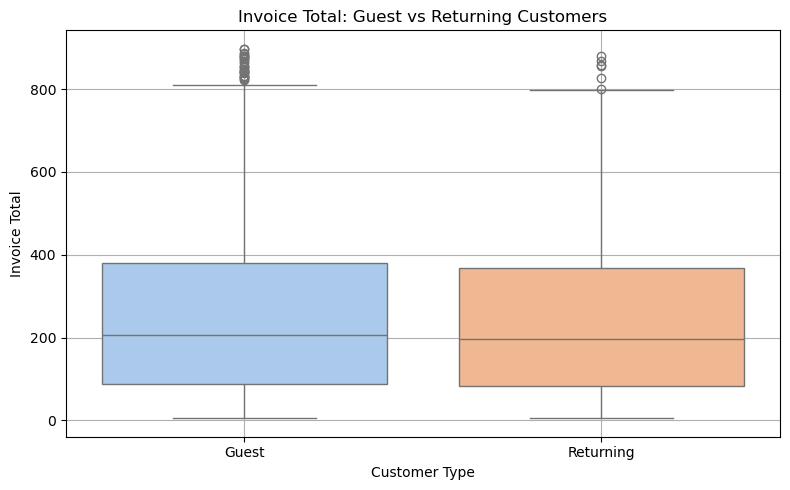

In [396]:
# Prepare data
invoice_comparison = df[['InvoiceNo', 'InvoiceTotal', 'CustomerType']].drop_duplicates()

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='CustomerType', y='InvoiceTotal', data=invoice_comparison, palette='pastel')
plt.title('Invoice Total: Guest vs Returning Customers')
plt.ylabel('Invoice Total')
plt.xlabel('Customer Type')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Vedit\AppData\Local\Temp\ipykernel_404\2845674491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='TotalPrice', data=weekday_sales, palette='coolwarm')


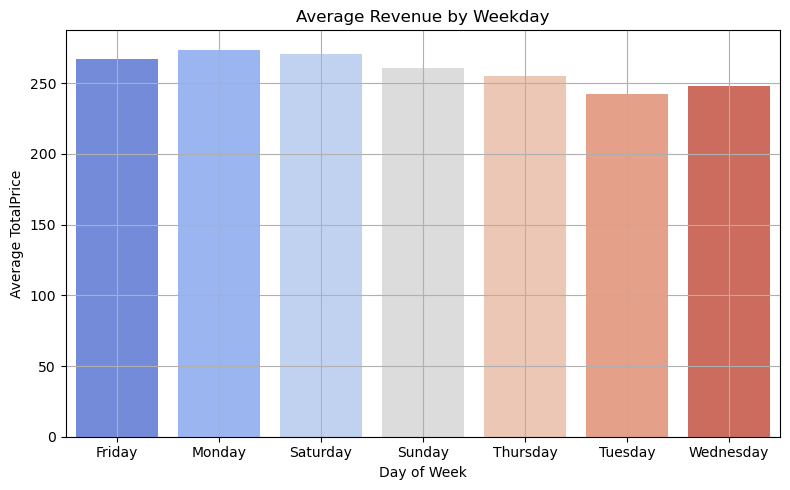

In [398]:
# Aggregate average revenue per weekday
weekday_sales = df.groupby('day_of_week')['TotalPrice'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='day_of_week', y='TotalPrice', data=weekday_sales, palette='coolwarm')
plt.title('Average Revenue by Weekday')
plt.ylabel('Average TotalPrice')
plt.xlabel('Day of Week')
plt.grid(True)
plt.tight_layout()
plt.show()


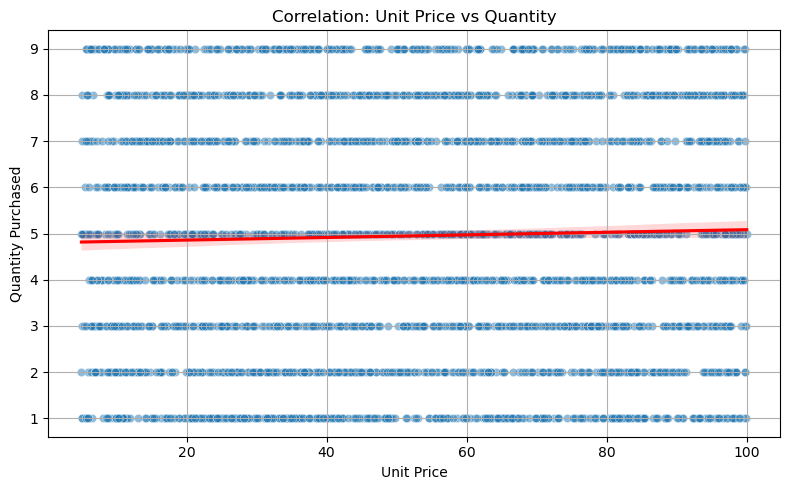

In [400]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, alpha=0.5)
sns.regplot(x='UnitPrice', y='Quantity', data=df, scatter=False, color='red')
plt.title('Correlation: Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Purchased')
plt.grid(True)
plt.tight_layout()
plt.show()
